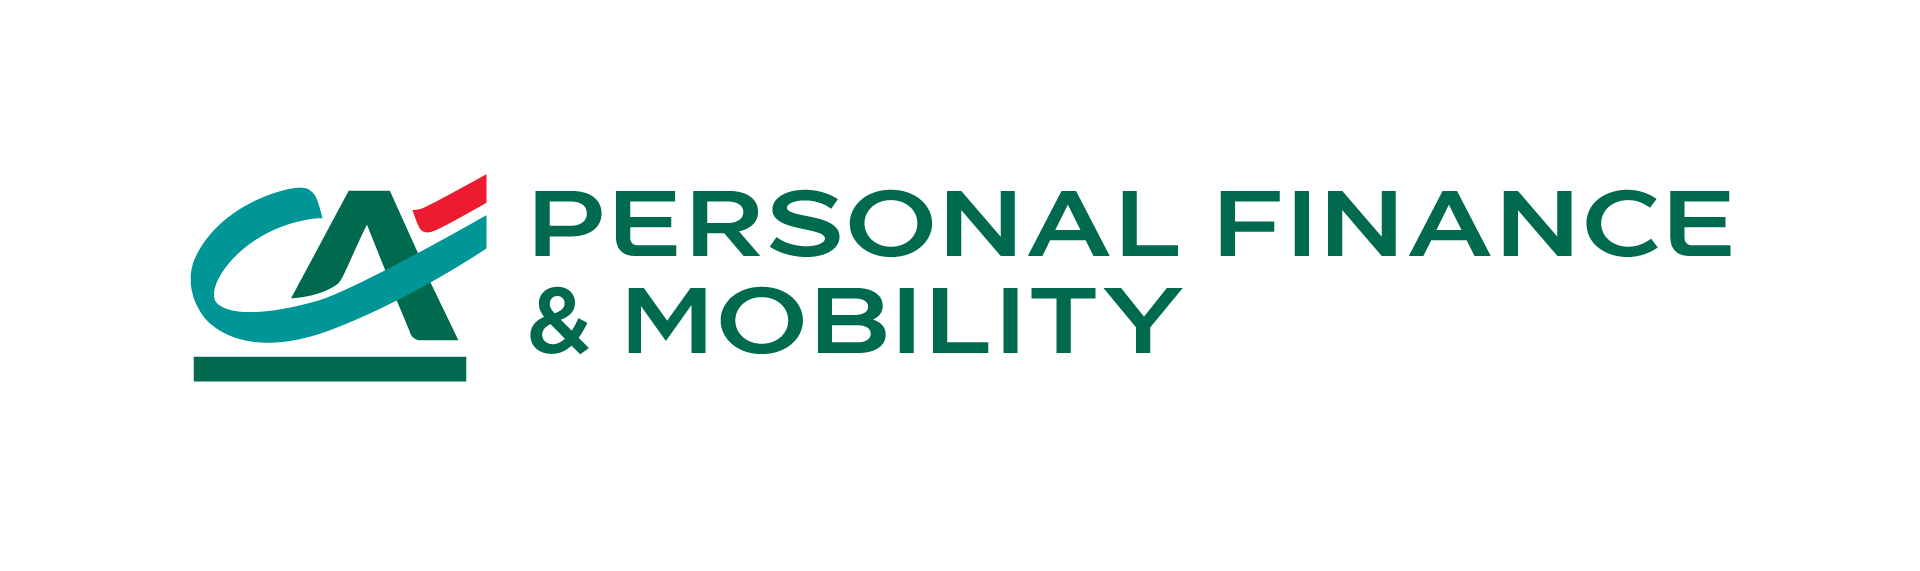

<h1><center>Direction de l’Inspection Générale Groupe</center></h1>
<h1><center>Crédit Agricole Personal Finance & Mobility</center></h1>
<h2><center>Test bank_client – bank_client Scientist</center></h2>

<h1></h1>
<h1><center><font color='green'>Introduction<font></center></h1>

#### Le but de ce test est d’évaluer vos connaissances sur plusieurs aspects du métier d’un bank_client scientist à travers la réalisation de différents développements que vous pourriez être amenés à réaliser dans notre équipe d’Audit.  
#### Le test contient 3 sections qui couvrent SQL, Python, les statistiques et le machine learning :
1. SQL
2. Python
3. Machine Learning

#### Vous avez **2h30** à compter de la réception du test par e-mail pour nous retourner votre travail. Ce test est open book c’est-à-dire que vous pouvez utiliser toutes les ressources que vous jugez nécessaires pour la réalisation du test (internet, livre) mais vous devez vous mettre en responsabilité pour le réaliser seul(e). NEANMOINS les outils d'IA tels que ChatGPT sont interdits lors de la réalisation de ce test : en effet Crédit Agricole Personal Finance & Mobility (CAPFM) ne permet pas à ses employés d'utiliser de tels logiciels, et nous souhaitons évaluer votre capacité à travailler de manière autonome, sur Python et SQL, à CAPFM. La fiabilité de vos scripts sera autant évaluée que votre capacité à couvrir l’ensemble du test.
#### Vous utiliserez votre ordinateur personnel afin de réaliser ce test. Ce Notebook est fournis comme base pour y saisir vos réponses dans les cellules indiquées.
####
#### **Bonne chance !**
####
*Veuillez ne pas partager le contenu de ce test, ceci pourrait avoir un impact dans le processus de recrutement.
Cette analyse de cas est totalement fictive, et ne présente aucun lien direct et indirect avec l’activité de Crédit Agricole Personal Finance & Mobility ou du Groupe Crédit Agricole, de ses clients, de ses salariés ou de ses partenaires.*

<h1></h1>
<h1><center><font color='green'>1 - SQL<font></center></h1>

#### Vous disposez d'une base de données *test_bank_clientbase.db* fournie. Cette section comporte 2 exercices pour lesquels des requêtes SQL sont attendues.
#### Afin de réaliser les exercices sur la partie SQL, des bouts de code vous sont fournies pour importer la base de données et faciliter la mise en page des résultats de vos requêtes.
#### Veuillez exécuter les cellules suivantes afin de commencer les exercices :

In [12]:
import sqlite3
import pandas as pd

##### --> Lecture de la base de données:

In [19]:
conn = sqlite3.connect('test_database')
#c = conn.cursor()

##### --> Tables disponibles dans la base de données:

In [22]:
pd.read_sql_query('SELECT name from sqlite_master where type= "table";', conn)

,name
0,contrats
1,partenaires


##### --> N'hésitez pas à utiliser **pd.read_sql_query()** afin d'afficher les tables et les explorer afin de faciliter la compréhension des questions...

In [25]:
query = """
    SELECT * FROM CONTRATS"""
pd.read_sql_query(query, conn)

,contrat_id,client_id,date_contrat,montant_contrat,date_naissance
0,1,1,2023-12-01,1000.0,1990-01-01
1,2,2,2023-02-10,1500.0,1999-03-04
2,3,14,2023-02-09,300.0,2000-04-22
3,4,4,2022-02-01,550.0,1989-03-15
4,5,8,2023-01-08,3000.0,1985-03-15
5,6,2,2023-04-09,4300.0,1998-10-15
6,7,11,2023-02-01,1000.0,1987-03-17
7,8,29,2023-11-29,1100.0,1995-01-02
8,9,38,2022-09-12,1500.0,1995-08-15
9,10,5,2022-07-12,3200.0,1992-10-15


<h2><center><font color="yellowgreen">Exercice 1.1<font></center></h2>

#### Sachant que la table CONTRATS contient des millions de lignes, écrivez une requête SQL qui vous permet de retourner uniquement le 10ème contrat dont le montant est le plus élevé. 
#### *(Veuillez expliquer brièvement la logique derrière votre requête)*

In [28]:
query = """
    SELECT * FROM (SELECT * FROM CONTRATS ORDER BY montant_contrat DESC limit 10) order by montant_contrat limit 1;"""
pd.read_sql_query(query, conn)

,contrat_id,client_id,date_contrat,montant_contrat,date_naissance
0,1,1,2023-12-01,1000.0,1990-01-01


on selectionne les 10 contrats avec le montant le plus élevé, puis on les trie à l'ordre croissant, puis on selectionne le premier contrat.

<h2><center><font color="yellowgreen"><font></center></h2>

#### En utilisant la table PARTENAIRE, qui contient un ensemble de produits (paiement en 3 ou 4 fois / location longue durée / crédit) d'un de nos partenaires, veuillez écrire des requêtes SQL qui permettent de répondre aux besoins suivants : 
#### *(Veuillez expliquer brièvement la logique derrière vos requête)*




<h2><center><font color="yellowgreen">Exercice 1.2<font></center></h2>

### Affichez le client ayant pris un produit location à Rennes dont le montant est le plus élevé.


In [33]:
query = """
    SELECT C.client_id, C.date_naissance FROM PARTENAIRES P JOIN CONTRATS C ON C.contrat_id = P.contrat_id WHERE P.ville_achat = 'Rennes' and P.produit = 'location' ORDER BY P.montant_produit DESC LIMIT 1;"""
pd.read_sql_query(query, conn)

,client_id,date_naissance
0,38,1995-08-15


on fait une jointure de la table partenaires et contrats sur contrat_id, puis on selectionne client_id et date_naissance pour les clients dont la ville d'achat est Rennes et dont le produit acheté est location.

In [36]:
query = """
    SELECT * FROM PARTENAIRES
    """
pd.read_sql_query(query, conn)

,contrat_id,produit,date_achat,ville_achat,montant_produit
0,1,paiement_3fois,2023-01-01,Paris,854.00
1,2,paiement_4fois,2023-02-01,Lyon,750.00
2,3,paiement_3fois,2023-01-01,Paris,500.00
3,6,paiement_3fois,2022-02-01,Marseille,1254.50
4,7,credit,2022-01-01,Toulon,3500.00
5,11,location,2022-02-01,Toulouse,1750.00
6,4,credit,2023-01-01,Toulon,503.40
7,15,paiement_4fois,2022-02-01,Caen,1530.00
8,12,location,2023-01-01,Castres,5030.50
9,5,location,2022-02-01,Rennes,520.00


<h2><center><font color="yellowgreen">Exercice 1.3<font></center></h2>

### Affichez les 3 clients ayant pris un produit paiement_4fois ou paiement_3fois dont les contrats sont les plus anciens chez notre partenaire.

In [39]:
# b)
query = """
    SELECT C.client_id, C.date_contrat, P.produit FROM PARTENAIRES P JOIN CONTRATS C ON C.contrat_id = P.contrat_id 
    WHERE P.produit = 'paiement_4fois' or P.produit = 'paiement_3fois' order by C.date_contrat ASC limit 3;
    """
pd.read_sql_query(query, conn)

,client_id,date_contrat,produit
0,12,2022-03-01,paiement_4fois
1,5,2022-07-12,paiement_4fois
2,14,2023-02-09,paiement_3fois


Après une jointure entre partenaires et contrats, on selectionne le client_id, la date du contrat et le produit, puis on filtre le produit en gardant que paiement_4fois et paiement_3fois, puis on trie la date à l'ordre croissant, en on garde que les 3 premières sélections.

<h2><center><font color="yellowgreen">Exercice 1.4<font></center></h2>

### En utilisant les tables CONTRATS et PARTENAIRE veuillez afficher l'âge maximum et minimum des clients par type de produit.

In [43]:
# c)
query = """
    SELECT P.produit, MIN(STRFTIME('%Y', 'now') - STRFTIME('%Y', C.date_naissance)) AS age_min, 
    MAX(STRFTIME('%Y', 'now') - STRFTIME('%Y', C.date_naissance)) AS age_max
    FROM PARTENAIRES P JOIN CONTRATS C
    ON P.contrat_id = C.contrat_id
    GROUP BY P.produit;
    """
pd.read_sql_query(query, conn)

,produit,age_min,age_max
0,credit,33,38
1,location,30,40
2,paiement_3fois,25,35
3,paiement_4fois,26,33


Ici, j'ai trouvé la methode STRFTIME sur internet qui permet en faisant la soustraction, de déterminer l'âge de chaque client. On selectionne donc le produit, l'âge minimum et l'âge maximum, puis on fait une jointure entre contrats et partenaires, et on utilise GROUP BY pour regrouper les resultats par type de produit.

<h1></h1>
<h1><center><font color='green'>2 - Python<font></center></h1>

<h2><center><font color="yellowgreen">Exercice 2.1<font></center></h2>

#### a) En utilisant les listes ci-dessous, ainsi que le fichier CSV fourni (*Clients.csv*), construisez les bank_clientframes demandés.


In [71]:
# Construisez et affichez le bank_clientframe CONTRAT à partir des listes ci-dessous:
# bank_clientframe CONTRAT:
CONTRACT_ID = [1,5,7,15,6,8,9,45,23,16]  
CLIENT_ID = [1,10,9,1,8,5,11,5,9,10]  
PRODUIT = ['credit','location_longue_duree','credit','paiement_4fois','paiement_3fois','credit','location_longue_duree','credit','paiement_3fois','paiement_4fois']  
DATE_CONTRAT = ['01-12-2020','14-07-2021','25-11-2019','17-01-2016','24-08-2020','12-032021','17-05-2020','12-12-2019','14-08-2020','14-05-2019']  
MONTANT_CONTRAT = ['147,23','85,12','5210','4587,02','569,25','147,14','6589,2','1456,2','780,9','6985,2'] 

#Réponse:
bank_client_contrat = {'CONTRACT_ID' : CONTRACT_ID, 'CLIENT_ID': CLIENT_ID, 'PRODUIT': PRODUIT, 'DATE_CONTRAT': DATE_CONTRAT, 'MONTANT_CONTRAT':MONTANT_CONTRAT}
CONTRAT = pd.DataFrame(bank_client_contrat)
CONTRAT 


,CONTRACT_ID,CLIENT_ID,PRODUIT,DATE_CONTRAT,MONTANT_CONTRAT
0,1,1,credit,01-12-2020,"147,23"
1,5,10,location_longue_duree,14-07-2021,"85,12"
2,7,9,credit,25-11-2019,5210
3,15,1,paiement_4fois,17-01-2016,"4587,02"
4,6,8,paiement_3fois,24-08-2020,"569,25"
5,8,5,credit,12-032021,"147,14"
6,9,11,location_longue_duree,17-05-2020,"6589,2"
7,45,5,credit,12-12-2019,"1456,2"
8,23,9,paiement_3fois,14-08-2020,"780,9"
9,16,10,paiement_4fois,14-05-2019,"6985,2"


In [73]:
# Affichez et nettoyez le bank_clientframe CLIENT à partir du fichier Clients.csv fourni, 
# contenant les identifiants, dates de naissances et adresses des clients:

CLIENT = pd.read_csv('Clients.csv', encoding = 'latin1', sep=";")

CLIENT

,CLIENT_ID,VILLE,ADRESSE,Unnamed: 3,DATE_NAISSANCE
0,1.0,PARIS,24 avenue marcel,NaN,03-04-1995
1,5.0,MARSEILLE,12 boulevard du port,NaN,27-12-1978
2,9.0,TOURS,106 avenue michelet,NaN,21-16-1954
3,8.0,PARIS,14 avenue ternes,NaN,05-12-1990
4,10.0,LYON,18 avenue françois,NaN,14-12-2001
5,11.0,AMIENS,45 avenue jules,NaN,27011964
6,NaN,NaN,NaN,NaN,21-10-1993
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


On a choisi pour importer le csv de mettre un autre encodage que utf-8 car l'import ne marchait pas, et en regardant le csv sur textedit, on remarque que les séparations sont en ';', d'où le sep=";". Maintenant en affichant la base, on voit qu'il y'a plusieurs valeurs manquantes, des dates mal formatées et une colonne vide.

In [76]:
if 'Unnamed: 3' in CLIENT.columns:
    CLIENT = CLIENT.drop(columns=['Unnamed: 3'])
CLIENT #base sans la colonne inutile

,CLIENT_ID,VILLE,ADRESSE,DATE_NAISSANCE
0,1.0,PARIS,24 avenue marcel,03-04-1995
1,5.0,MARSEILLE,12 boulevard du port,27-12-1978
2,9.0,TOURS,106 avenue michelet,21-16-1954
3,8.0,PARIS,14 avenue ternes,05-12-1990
4,10.0,LYON,18 avenue françois,14-12-2001
5,11.0,AMIENS,45 avenue jules,27011964
6,NaN,NaN,NaN,21-10-1993
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [78]:
CLIENT = CLIENT[CLIENT['CLIENT_ID'].notna()]
CLIENT # suppression des NaN

,CLIENT_ID,VILLE,ADRESSE,DATE_NAISSANCE
0,1.0,PARIS,24 avenue marcel,03-04-1995
1,5.0,MARSEILLE,12 boulevard du port,27-12-1978
2,9.0,TOURS,106 avenue michelet,21-16-1954
3,8.0,PARIS,14 avenue ternes,05-12-1990
4,10.0,LYON,18 avenue françois,14-12-2001
5,11.0,AMIENS,45 avenue jules,27011964


In [80]:
CLIENT['DATE_NAISSANCE'] = pd.to_datetime(CLIENT['DATE_NAISSANCE'], dayfirst=True, errors='coerce')
CLIENT = CLIENT[CLIENT['DATE_NAISSANCE'].notna()]
CLIENT #SUPPRESSION DES DATES INVALIDES ET NETTOYAGE NaN

/var/folders/f6/jnbw6jc52ll24d0rxvv_bktr0000gn/T/ipykernel_13570/1339596757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLIENT['DATE_NAISSANCE'] = pd.to_datetime(CLIENT['DATE_NAISSANCE'], dayfirst=True, errors='coerce')


,CLIENT_ID,VILLE,ADRESSE,DATE_NAISSANCE
0,1.0,PARIS,24 avenue marcel,1995-04-03
1,5.0,MARSEILLE,12 boulevard du port,1978-12-27
3,8.0,PARIS,14 avenue ternes,1990-12-05
4,10.0,LYON,18 avenue françois,2001-12-14


In [82]:
CLIENT.loc[:, 'VILLE'] = CLIENT['VILLE'].str.strip().str.title()
CLIENT.loc[:, 'ADRESSE'] = CLIENT['ADRESSE'].str.strip().str.title()
CLIENT #Nettoyage des chaines de caractères (loc pour eviter warning)

,CLIENT_ID,VILLE,ADRESSE,DATE_NAISSANCE
0,1.0,Paris,24 Avenue Marcel,1995-04-03
1,5.0,Marseille,12 Boulevard Du Port,1978-12-27
3,8.0,Paris,14 Avenue Ternes,1990-12-05
4,10.0,Lyon,18 Avenue François,2001-12-14


<h2><center><font color="yellowgreen"><font></center></h2>

#### b) Croisez le bank_clientframes CLIENT avec le bank_clientframe CONTRAT.

In [85]:
CLIENT_JOINTC = pd.merge(CONTRAT, CLIENT, on  = 'CLIENT_ID', how = 'inner')
CLIENT_JOINTC

,CONTRACT_ID,CLIENT_ID,PRODUIT,DATE_CONTRAT,MONTANT_CONTRAT,VILLE,ADRESSE,DATE_NAISSANCE
0,1,1,credit,01-12-2020,"147,23",Paris,24 Avenue Marcel,1995-04-03
1,5,10,location_longue_duree,14-07-2021,"85,12",Lyon,18 Avenue François,2001-12-14
2,15,1,paiement_4fois,17-01-2016,"4587,02",Paris,24 Avenue Marcel,1995-04-03
3,6,8,paiement_3fois,24-08-2020,"569,25",Paris,14 Avenue Ternes,1990-12-05
4,8,5,credit,12-032021,"147,14",Marseille,12 Boulevard Du Port,1978-12-27
5,45,5,credit,12-12-2019,"1456,2",Marseille,12 Boulevard Du Port,1978-12-27
6,16,10,paiement_4fois,14-05-2019,"6985,2",Lyon,18 Avenue François,2001-12-14


<h2><center><font color="yellowgreen"><font></center></h2>

#### c) Affichez le nombre de contrats par ville par ordre croissant. 


In [88]:
CLIENT_JOINTC['VILLE'].value_counts().sort_values()

VILLE
Lyon         2
Marseille    2
Paris        3
Name: count, dtype: int64

<h2><center><font color="yellowgreen"><font></center></h2>

#### d) Affichez le minimum et le maximum des MONTANT_CONTRAT par client.


In [91]:
CLIENT_JOINTC.groupby('CLIENT_ID')['MONTANT_CONTRAT'].max()
CLIENT_JOINTC.groupby('CLIENT_ID')['MONTANT_CONTRAT'].min()

# on peut utiliser agg() pour les avoir sur la même ligne
CLIENT_JOINTC.groupby('CLIENT_ID')['MONTANT_CONTRAT'].agg(['min', 'max'])

,min,max
CLIENT_ID,,
1,"147,23","4587,02"
5,"1456,2","147,14"
8,"569,25","569,25"
10,"6985,2","85,12"


<h2><center><font color="yellowgreen"><font></center></h2>

#### e) En utilisant la librairie de visualisation de votre choix, affichez le montant total des contrats par année.

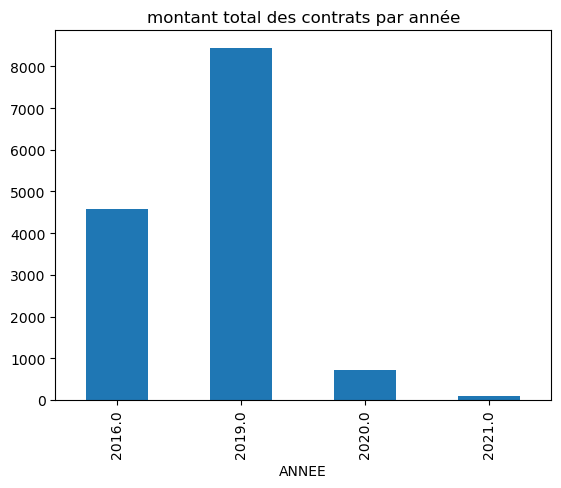

In [96]:
import matplotlib.pyplot as plt
CLIENT_JOINTC['DATE_CONTRAT'] = pd.to_datetime(CLIENT_JOINTC['DATE_CONTRAT'], dayfirst=True, errors='coerce')
CLIENT_JOINTC['MONTANT_CONTRAT'] = CLIENT_JOINTC['MONTANT_CONTRAT'].astype(str).str.replace(',', '.').astype(float)
CLIENT_JOINTC['ANNEE'] = CLIENT_JOINTC['DATE_CONTRAT'].dt.year
montant_total = CLIENT_JOINTC.groupby('ANNEE')['MONTANT_CONTRAT'].sum()

#graphique
montant_total.plot(kind = 'bar', title = 'montant total des contrats par année')
plt.show()

<h2><center><font color="yellowgreen">Exercice 2.2<font></center></h2>

### Développez une fonction qui permet de compter le nombre de caractères identiques dans une chaîne de caractère, et ainsi de renvoyer la valeur du plus grand nombre et de la lettre qui lui est associée.

In [223]:
# Réponse :
def frequence_caractere_max(ch):
    compteur = {}
    lettre_max = ''
    occurrence_lettre = 0
    for c in ch:
        if c in compteur:
            compteur[c]+=1
        else:
            compteur[c]=1
        if compteur[c]>occurrence_lettre:
            occurrence_lettre = compteur[c]
            lettre_max = c
    return occurrence_lettre, lettre_max

print(frequence_caractere_max("ecolier"))

(2, 'e')


<h2><center><font color="yellowgreen">Exercice 2.3<font></center></h2>

### Attention: Cette exercice doit être réalisé au moyen d'un algorithme récursif.
### A partir d'un dictionnaire imbriqué à au plus 3 niveaux (Ville, Rue, Numéro), comprennant les nom et prénoms des clients en fonction de leur adresse, retourner un dictionnaire applati où chaque clé correspond à l'adresse complète du client et chaque valeur, son nom et prénom.

### Entrée : 

### Sortie désirée : 

In [225]:
# Réponse :
def aplatir_adresses(dico):
    resultat = {}
    for ville, rues in dico.items():
        for rue, numeros in rues.items():
            for numero, nom in numeros.items() if isinstance(numeros, dict) else [(rue, numeros)]:
                adresse = f"{ville} {rue} {numero}"
                resultat[adresse] = nom
    return resultat

    #inspiré d'un code trouvé sur internet

In [263]:
dico = {
    "Paris":{
        "Rue de la grande truanderie":{
            5:"Marc Antoine",
            10:"Jean Jacques Martin"
        },
        "Rue de la paix": "David Zao"
    },
    "Lyon":{
        "Rue Mercière":{
            1: "Frank Sauze",
            99: "Mike King"
        }
    }
}
print(aplatir_adresses(dico))

{'Paris Rue de la grande truanderie 5': 'Marc Antoine', 'Paris Rue de la grande truanderie 10': 'Jean Jacques Martin', 'Paris Rue de la paix Rue de la paix': 'David Zao', 'Lyon Rue Mercière 1': 'Frank Sauze', 'Lyon Rue Mercière 99': 'Mike King'}


<h2><center><font color="yellowgreen">Exercice 2.4<font></center></h2>

#### En utilisant un bitstring b qui vous a été fourni, veuillez changer un seul et unique bit 0 en 1 afin de créer la séquence de 1 la plus longue possible. La fonction devra retourner la longueur de la plus longue séquence de 1 trouvée.

<h3><center>b=011110111011</center></h3>

#### *Exemple: b=11011101111 -> en changeant le second 0 en 1 on aura 11011111111 où la séquence maximale de 1 sera égale à 8*

In [273]:
# Réponse :
def max_sequence(b):
    max_len = 0  # stock de la longueur max de la séquence de 1
    for i in range(len(b)):
        # Si le bit est 0, on change en 1
        if b[i] == '0':
            # Remplacer le 0 par un 1
            modifie_b = b[:i] + '1' + b[i+1:]
            # Calculer la longueur de la plus longue séquence de 1
            max_len = max(max_len, len(max(modified_b.split('0'), key=len)))
    
    return max_len

<h1></h1>
<h1><center><font color='green'>3 - Machine Learning<font></center></h1>

#### En utilisant le jeu de données fourni en pièce jointe (*bank_client.csv*) ainsi que le dictionnaire de données correspondant (*bank_client_dict.docx*) et en utilisant les algorithmes de machine learning que vous connaissez, développez un modèle qui permet de prédire si le client va ouvrir un compte après une campagne marketing (colonne "y").

####
#### Réalisez le modèle en utilisant les étapes suivantes :  
#### 1 - Préparation du jeu de données (nettoyage des données + choix des attributs…)  
#### 2 - Choix du modèle et définition des hyper paramètres  
#### 3 - Entraînement et évaluation du modèle  
####
#### *(Pour cette partie l’envoi de votre code python est suffisant, vous n’êtes pas obligé de packager votre modèle entrainé)*


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [256]:
bank_client = pd.read_csv("bank_client.csv")

In [260]:
from sklearn.metrics import classification_report

#Sélection des colonnes utiles
features = ['age', 'job', 'marital', 'education', 'default', 'balance',
            'housing', 'loan', 'contact', 'month', 'day', 'duration',
            'campaign', 'pdays', 'previous', 'poutcome']
X = data[features]
y = data['y']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

#  entraînement du modèle sur toute la base
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Prediction sur la même base
y_pred = model.predict(X)

# Affichage des résultats
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.34      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


le modèle detecte bien les 'non' (0.98), mais mal les 'yes' (0.34)(Recall), avec une precision de 0.92 et 0,65 respectivement pour 'non' et 'yes'.